In [2]:
import numpy as np
import matplotlib.pyplot as plt 
# import astropy.units as u

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [89]:
def delay_time(ν, DM): # [MHz], [pc/cm**3]
    constant = 4140
    return (constant*DM)/(ν**2)

In [30]:
data = np.loadtxt('mock_pulsar_data.txt')

In [31]:
times = data[:,0] # 0th column
times.shape

(128,)

In [87]:
power = data[:,1:]
power.shape
power[27]

array([2.342, 2.344, 1.112, ..., 0.609, 0.552, 1.18 ])

In [79]:
freqs = np.linspace(1.000, 2.000, power.shape[1]) # GHz
freqs.shape

(1024,)

/tmp/ipykernel_1429/1922312026.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')


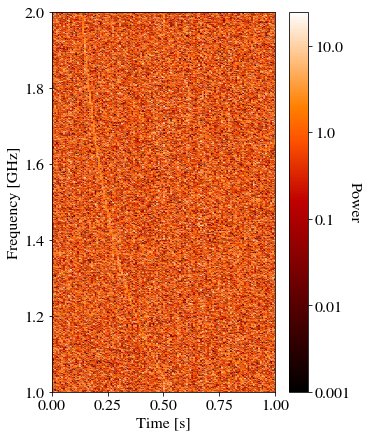

In [135]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
    plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0], times[-1]); plt.ylim(freqs[0], freqs[-1])

plt.show()

/tmp/ipykernel_1429/847895266.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')


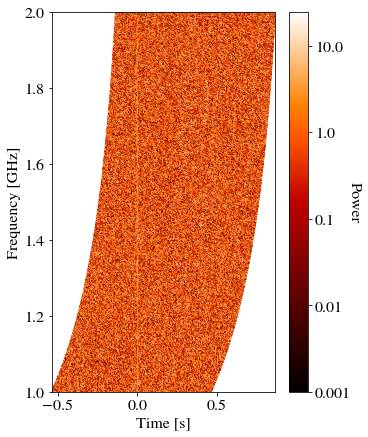

In [195]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
#     print(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130))
    plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0]-delay_time(freqs.min()*10**3, 130), times[-1]-delay_time(freqs.max()*10**3, 130))
plt.ylim(freqs[0], freqs[-1])
plt.show()